# FIFA 19 Data Exploration

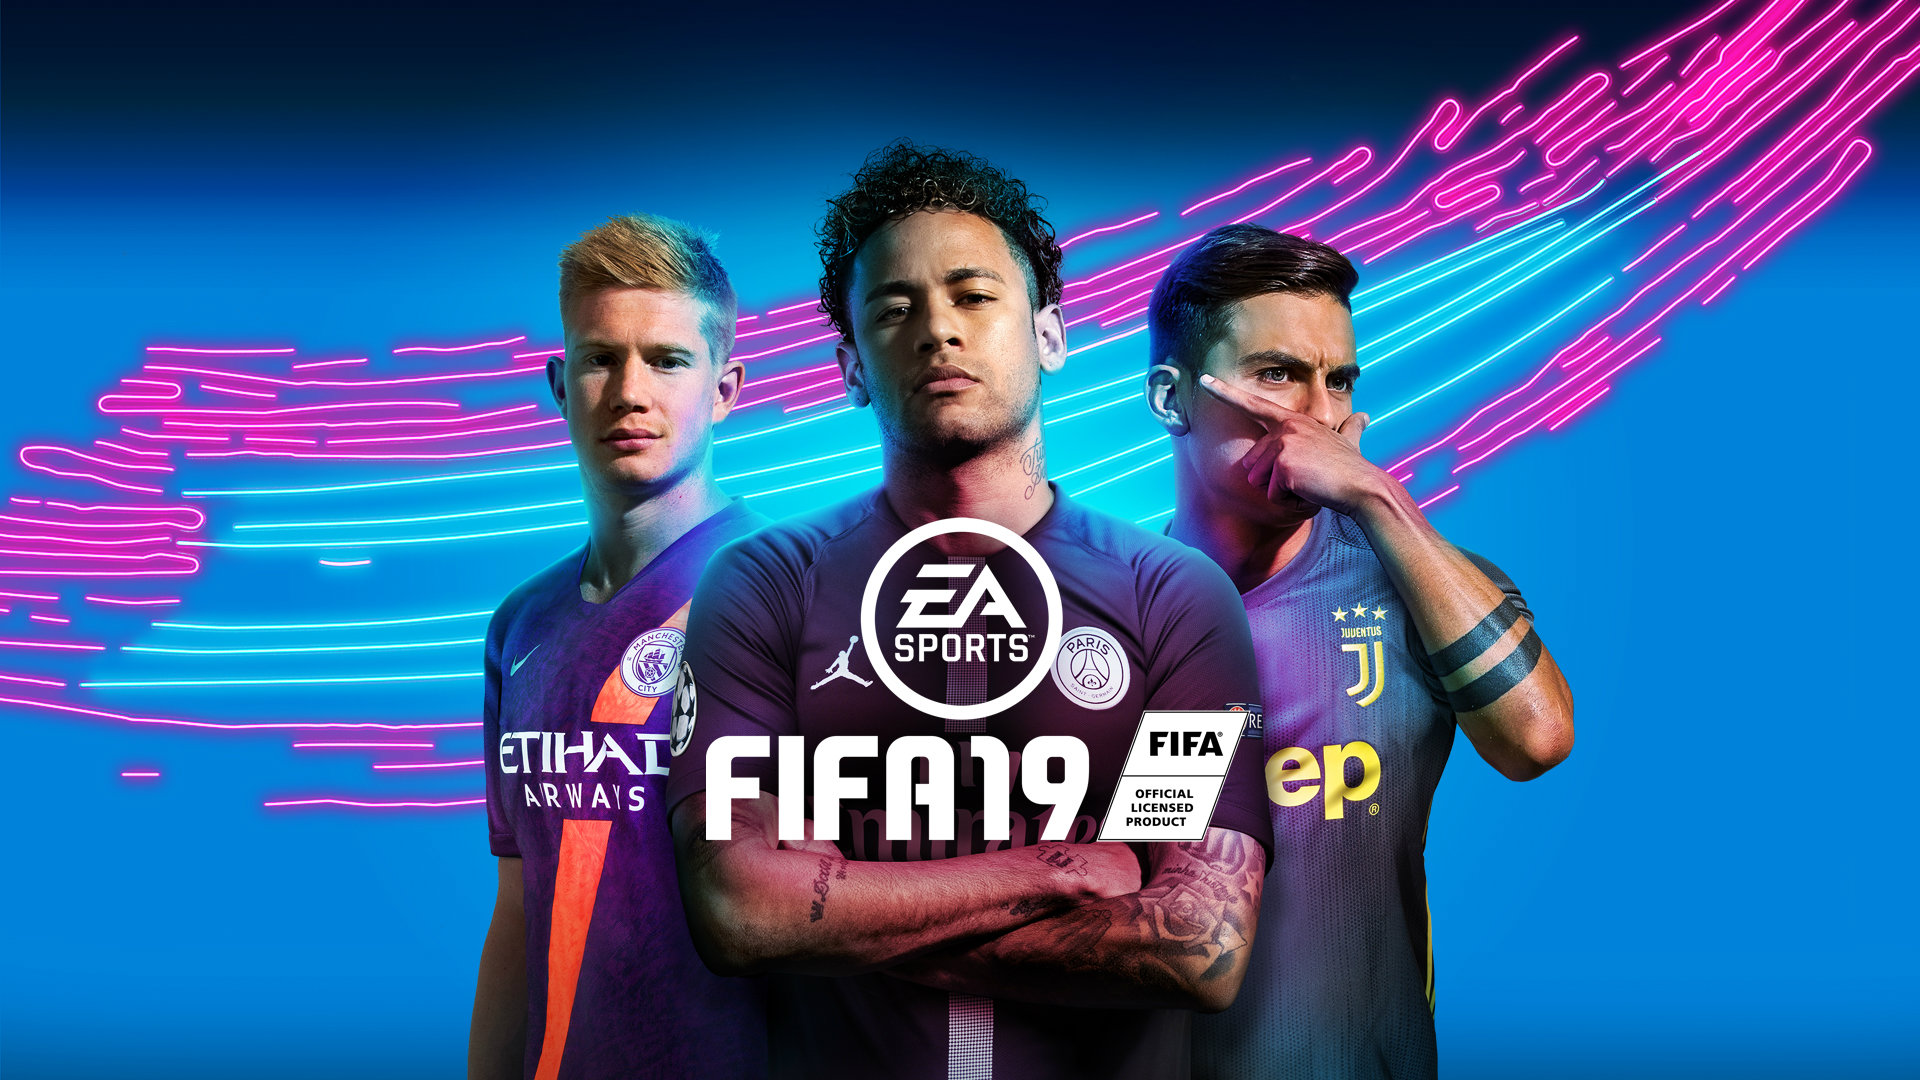

## Investigation Overview
In this investigation, i wanted to look at factors that affects a players value and also factors that affects a players performance.



## Dataset Overview
This is FIFA 19 dataset and originally, the dataset contains 18207 observation and 88 columns. The dataset set had some missing values which i cleaned and i formed a new data frame for the columns that would be of interest in my analysis. After wrangling, my new dataset had 16643 observations and 17 columns.

**Features of interest**:
- Age
- Nationality
- Club
- Release Clause
- Wage
- Value
- Preferred Foot
- Position
- Weight
- Finishing
- Dribbling
- BallControl
- Stamina
- Jumping
- GKReflexes
- Body Type

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('fifa_19_cleaned.csv')

### Descriptive statistic observation

- The minimum age of a player is 16yrs and 75% of players are below 29 yrs of age.
- The maximum weight of a player is 243lbs.
- 50% of players have stamina rating of 66.

### What is the Age distribution of players?
- We have a right skewed distribution and majority of players are in their 20's.

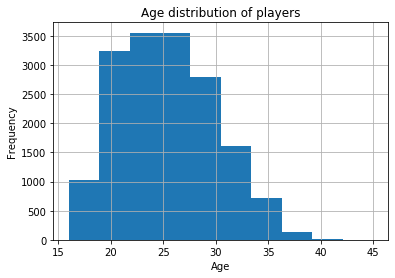

In [19]:
df['Age'].hist();
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age distribution of players');

### What is the weight distribution of players?
- We can see that the weight distribution of players looks normal.

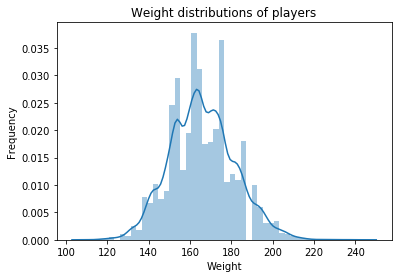

In [20]:
sns.distplot(df['Weight']);
plt.ylabel('Frequency')
plt.title('Weight distributions of players');

### What club is the top 10 most populated by players?
- We can see that 6 out of 10 clubs are from England, with 3 spanish clubs and 1 French.

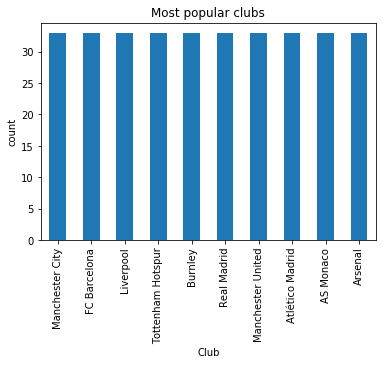

In [21]:

def n_bar_plot(dataFrame, col, a, b, title, x_label, y_label ):
    dataFrame[col].value_counts()[a:b].plot(kind='bar');
    plt.title(title);
    plt.xlabel(x_label)
    plt.ylabel(y_label);
    

n_bar_plot(df, 'Club', 0, 10, 'Most popular clubs', 'Club', 'count'  )

### Top 10 most player Nationality?
- Most players as we can see are from England which could also play a role to why the most populated clubs are England clubs.

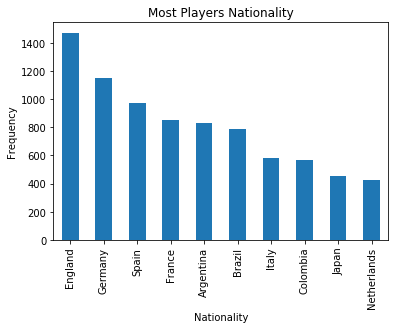

In [22]:

n_bar_plot(df, 'Nationality', 0, 10, 'Most Players Nationality', 'Nationality', 'Frequency')

### Lets look at most preferred foot by players
- As we can see, most of the  players are right footed and this is also true for the real world.

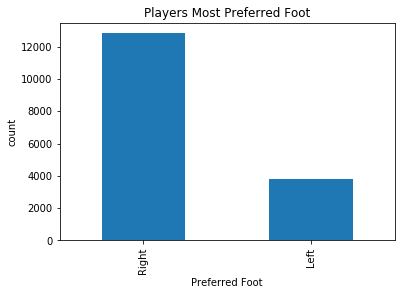

In [23]:
def bar_plot(dataFrame, col, title, x_label, y_label):
    dataFrame[col].value_counts().plot(kind='bar');
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label);


bar_plot(df, 'Preferred Foot', 'Players Most Preferred Foot', 'Preferred Foot', 'count')

### Players Positioning
- Most of the players in FIFA19 are strikers (ST) followed by GoalKeepers(GK)

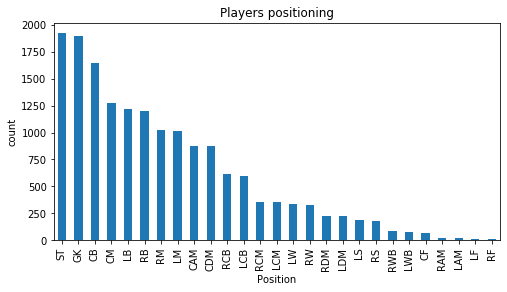

In [24]:
plt.figure(figsize=(8,4))
bar_plot(df, 'Position', 'Players positioning', 'Position', 'count')

### Correlation between Weight and Finishing
- There seems to be no correlation between a players weight and fininishing which is right, as the weight of a player do not necessarily mean he will deliver a good finishing. 

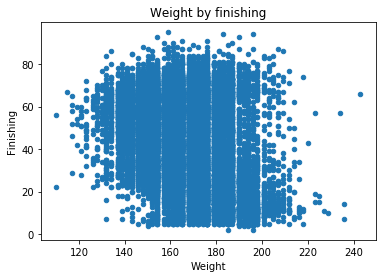

In [25]:
df.plot(x='Weight', y='Finishing', kind='scatter', title='Weight by finishing');

### Correlation between BallControl and Finishing
- There seems to be no correlation between a players weight and fininishing which is right, as the weight of a player do not necessarily mean he will deliver a good finishing. 

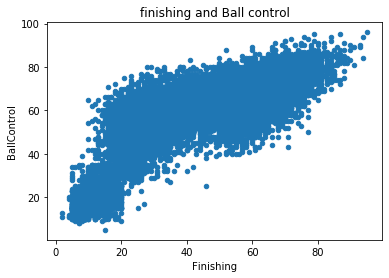

In [26]:
# correlation between ball control and finishing

df.plot(y='BallControl', x='Finishing', kind='scatter', title='finishing and Ball control');

### Correlation between Dribbling and Finishing
- As we can see theres a strong positive correlation here with which we can all agree to.

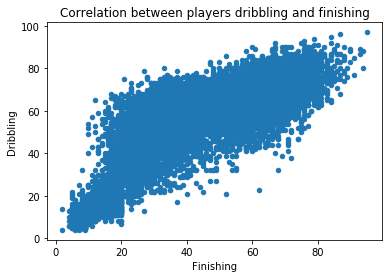

In [27]:
# correlation between dribbling and finishing

df.plot(y='Dribbling', x='Finishing', kind='scatter');
plt.title('Correlation between players dribbling and finishing');

### Value of player based on body type
- As we can see, players with normal body type are valued more compared to the rest body type.

Text(0.5, 1.0, 'Value of player by Body type')

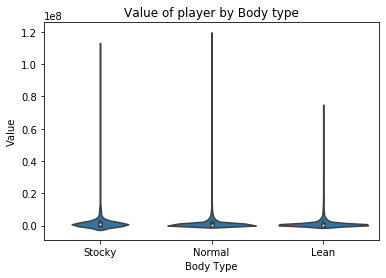

In [28]:
#violin plot on players body type

base_color = sns.color_palette()[0]
sns.violinplot(x='Body Type', y='Value', color = base_color, data=df);
plt.title('Value of player by Body type')

### What club has most player wage?
- Real Madrid a spanish club is the club with most wage.

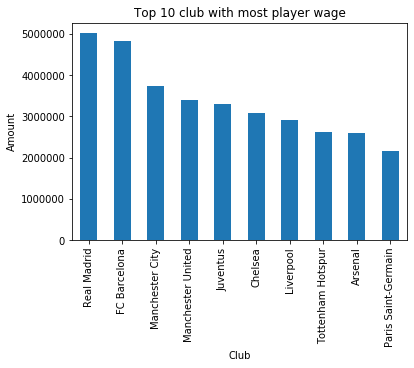

In [29]:
club_by_wage =df.groupby('Club')['Wage'].sum().sort_values(ascending=False).head(10)
club_by_wage.plot.bar(title='Top 10 club with most player wage')
plt.ylabel('Amount');

### Preferred fot vs Value
- Left footed players as we have seen have more value when comapared to right footed players.


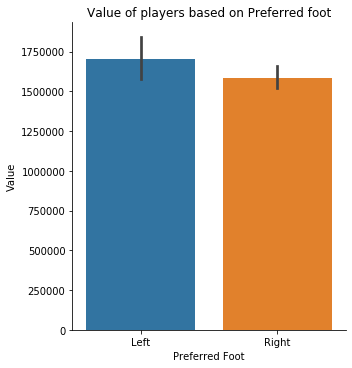

In [30]:
sns.catplot(x='Preferred Foot',y='Value', kind='bar', data=df);
plt.title('Value of players based on Preferred foot');

### Age, Weight and Body Type of players
- from observation, most young players weigh less and in accordance to their body type, they are lean

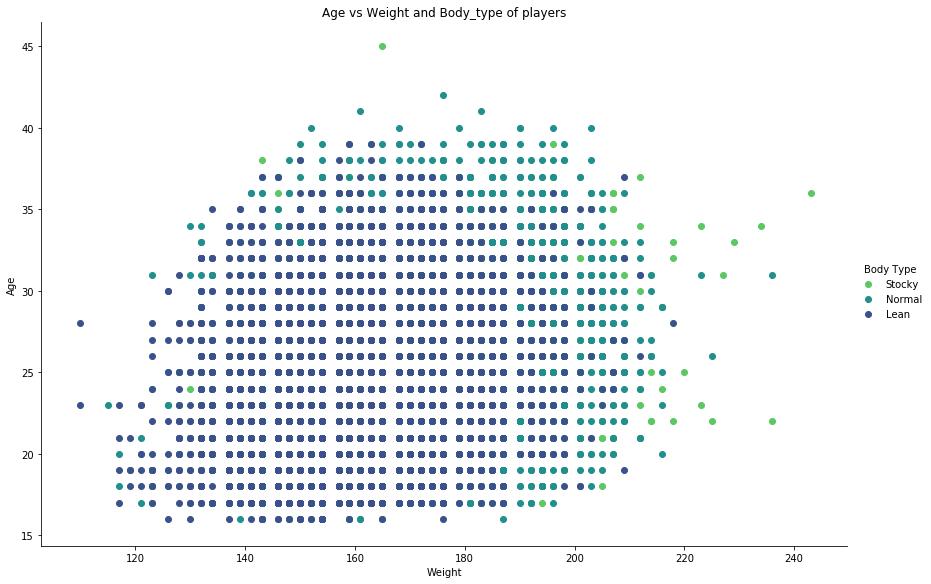

In [31]:
g = sns.FacetGrid(data = df, hue = 'Body Type', height = 8, aspect = 1.5, palette = 'viridis_r')
g.map(plt.scatter, 'Weight', 'Age');
g.add_legend();
plt.title('Age vs Weight and Body_type of players');

### Players Body Type, Value and Preferred foot
- players of stocky bosy type are more left footed and they have more value

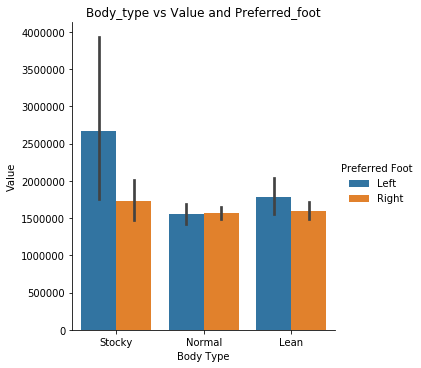

In [32]:
sns.catplot(x='Body Type',y='Value', hue='Preferred Foot', kind='bar', data=df);
plt.title('Body_type vs Value and Preferred_foot');

In [33]:
!jupyter nbconvert part_2_exploration_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook part_2_exploration_template.ipynb to slides
[NbConvertApp] Writing 1026934 bytes to part_2_exploration_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\user\anaconda3\lib\site-packages\jupyter_core\application.py", line 268, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\traitlets\config\application.py", line 664, in launch_instance
    app.start()
  File "C:\Users\user\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 340, in start
    self.convert_notebooks()
  File "C:\Users\user\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 510, in convert_notebooks
    self.convert_single_notebook(notebook_file